## 모듈 import

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings('ignore')

## 데이터셋 로드

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 남자(man), 여자(woman), 아이(child)
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## apply() - 함수를 적용

`apply()`는 데이터 전처리시 굉장히 많이 활용하는 기능입니다.

좀 더 복잡한 **logic을 컬럼 혹은 DataFrame에 적용**하고자 할 때 사용합니다.

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**who** 컬럼에 대하여 man은 남자, woman은 여자, child는 아이로 변경하고자 한다면 apply를 활용하여 해결할 수 있습니다.

In [4]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

### 함수(function) 정의

In [5]:
# 복잡한 전처리나 로직을 미리 모듈화
def transform_who(x): # apply에서 쓸 함수는 매개변수를 단 하나만 받아야 한다
    if x == 'man':
        return '남자'
    elif x == 'woman':
        return '여자'
    else:
        return '아이'

In [6]:
df['who'].apply(transform_who) # iterator처럼 동작, who컬럼 내부의 값들을 하나씩 쓴다

0      남자
1      여자
2      여자
3      여자
4      남자
       ..
886    남자
887    여자
888    여자
889    남자
890    남자
Name: who, Length: 891, dtype: object

분포를 확인하면 다음과 같습니다.

In [7]:
df['who'].apply(transform_who).value_counts()

남자    537
여자    271
아이     83
Name: who, dtype: int64

In [8]:
def transform_who(x):
    return x['fare'] / x['age'] # 두 개 이상의 컬럼을 참조 -> 이때는 데이터프레임 전체에 함수를 적용해야 한다

In [9]:
df.apply(transform_who, axis=1) # 데이터프레임 전체에 함수를 적용, axis=1을 적용하여 한 행 전체가 넘어오게 한다
# 이 값을 알아서 새로운 행에 쓰든지 하면 됨. axis=1을 빼면 오류!

0      0.329545
1      1.875876
2      0.304808
3      1.517143
4      0.230000
         ...   
886    0.481481
887    1.578947
888         NaN
889    1.153846
890    0.242188
Length: 891, dtype: float64

## apply() - lambda 함수

간단한 logic은 함수를 굳이 정의하지 않고, lambda 함수로 쉽게 해결할 수 있습니다.

In [10]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

**0: 사망, 1: 생존** 으로 변경하도록 하겠습니다.

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df['survived'].apply(lambda x: '생존' if x == 1 else '사망') # 삼항 연산자로 x가 1이면 생존 아니면 사망을 반환하게 한다.

0      사망
1      생존
2      생존
3      생존
4      사망
       ..
886    사망
887    생존
888    사망
889    생존
890    사망
Name: survived, Length: 891, dtype: object

In [13]:
df['survived'].apply(lambda x: '생존' if x == 1 else '사망').value_counts()

사망    549
생존    342
Name: survived, dtype: int64

### 연습문제

In [22]:
sample = df.copy()
sample.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
sample['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

`sample` 데이터프레임에 대하여 `apply()`를 활용하여 `class` 컬럼의 값을 다음과 같이 바꾸고, 분포를 출력후 변경 전과 동일한지 확인하세요

In [24]:
# 코드를 입력해 주세요

def func(x):
    if x == 'First':
        return '일등석'
    elif x == 'Second':
        return '이등석'
    else:
        return '삼등석'
        

sample['class'].apply(func).value_counts()

삼등석    491
일등석    216
이등석    184
Name: class, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>삼등석    491
일등석    216
이등석    184
Name: class, dtype: int64</pre>

## groupby() - 그룹

데이터를 특정 기준으로 그룹핑할 때 활용합니다. 엑셀의 피봇테이블과 유사합니다.

**참고링크**
- [판다스(Pandas) .groupby()로 할 수 있는 거의 모든 것!](https://teddylee777.github.io/pandas/pandas-groupby)

![](https://www.w3resource.com/w3r_images/pandas-groupby-split-apply-combine.svg)

**groupby는 항상 통계함수를 적용해야하며, 통계함수를 사용하면 자동으로 결과를 combine하여 보여줍니다.**

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


타이타닉 호의 생존자와 사망자를 **성별** 기준으로 그룹핑하여 **평균**을 살펴보겠습니다.

In [26]:
df.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


`groupby()`를 사용할 때는 반드시 aggregate 하는 **통계함수와 일반적으로 같이 적용**합니다.

### 2개 이상의 컬럼으로 그룹

2개 이상의 컬럼으로 그룹핑할 때도 list로 묶어서 지정하면 됩니다.

In [27]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass']).mean() # 여기서 sex, pclass는 index임. 즉, column이 아니다

survived        age     sibsp     parch        fare  \
sex    pclass                                                        
female 1       0.968085  34.611765  0.553191  0.457447  106.125798   
       2       0.921053  28.722973  0.486842  0.605263   21.970121   
       3       0.500000  21.750000  0.895833  0.798611   16.118810   
male   1       0.368852  41.281386  0.311475  0.278689   67.226127   
       2       0.157407  30.740707  0.342593  0.222222   19.741782   
       3       0.135447  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    pclass                        
female 1         0.000000  0.361702  
       2         0.000000  0.421053  
       3         0.000000  0.416667  
male   1         0.975410  0.614754  
       2         0.916667  0.666667  
       3         0.919308  0.760807

### 1개의 특정 컬럼에 대한 결과 도출

우리의 주요 관심사는 `survived` 컬럼입니다. 만약 `survived`컬럼에 대한 결과만 도출하고 싶다면 컬럼을 맨 끝에 지정합니다.

In [28]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])['survived'].mean() # DataFrame에서 하나의 Series만 본 것
# 여기서도 sex, pclass는 index임!

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

예쁘게 출력하려면 `pd.DataFrame()`으로 감싸주거나, `survived` 컬럼을 []로 한 번 더 감싸주면 됩니다.

In [29]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])['survived'].mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [30]:
# DataFrame으로 출력
pd.DataFrame(df.groupby(['sex', 'pclass'])['survived'].mean())

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [31]:
# DataFrame으로 출력
df.groupby(['sex', 'pclass'])[['survived']].mean() # 대괄호에 한번 더 감싸

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### reset_index(): 인덱스 초기화

`reset_index()`: 그룹핑된 데이터프레임의 **index를 초기화**하여 새로운 데이터프레임을 생성합니다.

In [32]:
# index 초기화
df.groupby(['sex', 'pclass'])['survived'].mean().reset_index() # index가 실제 column으로 들어간다

,sex,pclass,survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


In [36]:
# 원래는 행이 뒤죽박죽으로 나오지만 0 1 2 ... 로 정렬되고 column으로 들어가는 index 열도 drop시킨다
df.sort_values('age', ascending = False).head(10).reset_index(drop=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
1,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
2,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
3,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
4,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
5,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
6,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
7,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
8,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
9,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [37]:
df.sort_values('age', ascending = False, ignore_index=True).head(10) # 이렇게도 가능

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
1,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
2,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
3,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
4,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
5,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
6,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
7,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
8,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
9,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


### 다중 컬럼에 대한 결과 도출

끝에 단일 컬럼이 아닌 여러 개의 컬럼을 지정합니다.

In [33]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].mean() # fancy index

survived        age
sex    pclass                     
female 1       0.968085  34.611765
       2       0.921053  28.722973
       3       0.500000  21.750000
male   1       0.368852  41.281386
       2       0.157407  30.740707
       3       0.135447  26.507589

### 다중 통계 함수 적용

여러 가지의 통계 값을 적용할 때는 `agg()`를 사용합니다.

In [38]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].agg(['mean', 'sum'])

survived            age         
                   mean sum       mean      sum
sex    pclass                                  
female 1       0.968085  91  34.611765  2942.00
       2       0.921053  70  28.722973  2125.50
       3       0.500000  72  21.750000  2218.50
male   1       0.368852  45  41.281386  4169.42
       2       0.157407  17  30.740707  3043.33
       3       0.135447  47  26.507589  6706.42

In [40]:
# 위 데이터프레임을 보면 multi-index로 되어 있음
a = df.groupby(['sex', 'pclass'])[['survived', 'age']].agg(['mean', 'sum'])
a['survived']['sum'] # 이렇게 survived 열에 대한 sum만 가져올 수도 있지만

sex     pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: sum, dtype: int64

In [43]:
a[[('survived', 'sum'), ('age', 'mean')]] # 튜플로 survived의 sum만 가져올 수도 있음
# 지금은 survived의 sum과 age의 mean을 따로 가져온 것

survived        age
                   sum       mean
sex    pclass                    
female 1            91  34.611765
       2            70  28.722973
       3            72  21.750000
male   1            45  41.281386
       2            17  30.740707
       3            47  26.507589

## 연습문제

In [44]:
sample = df.copy()
sample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


`groupby()`를 활용하여 다음을 출력 하세요

`pclass` 별 생존율

In [46]:
# 코드를 입력해 주세요
sample.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

<p><strong>[출력 결과]</strong></p><pre>pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64</pre>

`embarked` 별 생존율 통합 통계

In [53]:
# 코드를 입력해주세요
sample.groupby('embarked')['survived'].agg(['mean', 'var'])

,mean,var
embarked,,
C,0.553571,0.248610
Q,0.389610,0.240943
S,0.336957,0.223764


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean</th>
      <th>var</th>
    </tr>
    <tr>
      <th>embarked</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>C</th>
      <td>0.553571</td>
      <td>0.248610</td>
    </tr>
    <tr>
      <th>Q</th>
      <td>0.389610</td>
      <td>0.240943</td>
    </tr>
    <tr>
      <th>S</th>
      <td>0.336957</td>
      <td>0.223764</td>
    </tr>
  </tbody>
</table>
</div>

`who`, `pclass`별 생존율, 생존자수

In [55]:
# 코드를 입력해 주세요
sample.groupby(['who', 'pclass'])['survived'].agg(['mean', 'sum'])

mean  sum
who   pclass               
child 1       0.833333    5
      2       1.000000   19
      3       0.431034   25
man   1       0.352941   42
      2       0.080808    8
      3       0.119122   38
woman 1       0.978022   89
      2       0.909091   60
      3       0.491228   56

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>mean</th>
      <th>sum</th>
    </tr>
    <tr>
      <th>who</th>
      <th>pclass</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">child</th>
      <th>1</th>
      <td>0.833333</td>
      <td>5</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.000000</td>
      <td>19</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.431034</td>
      <td>25</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">man</th>
      <th>1</th>
      <td>0.352941</td>
      <td>42</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.080808</td>
      <td>8</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.119122</td>
      <td>38</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">woman</th>
      <th>1</th>
      <td>0.978022</td>
      <td>89</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.909091</td>
      <td>60</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.491228</td>
      <td>56</td>
    </tr>
  </tbody>
</table>
</div>

- 남자의 나이는 남자 나이의 평균으로 채우세요
- 여자의 나이는 여자 나이의 평균으로 채우세요

In [59]:
# 결측치 확인
print(sample['age'].isnull().sum())
print(f"age 평균: {sample['age'].mean():.2f}")

177
age 평균: 29.70


In [66]:
# 코드를 입력해 주세요
sample['age'] = sample.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))
sample['age']


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [67]:
# 검증코드
print(sample['age'].isnull().sum())
print(f"age 평균: {sample['age'].mean():.2f}")

0
age 평균: 29.74


<p><strong>[출력 결과]</strong></p><pre>0
age 평균: 29.74
</pre>

In [68]:
def print_data(x):
    display(x)
    print('===============끝===============')

In [69]:
sample.groupby('sex')['age'].apply(print_data) # 성별기준으로 group으로 나누어서 age를 출력하고 있다.
# print_data는 female 또는 male로 나누어진 하나의 Series를 통째로 인자로 받아서 그것을 display한다

1      38.000000
2      26.000000
3      35.000000
8      27.000000
9      14.000000
         ...    
880    25.000000
882    22.000000
885    39.000000
887    19.000000
888    27.915709
Name: female, Length: 314, dtype: float64

===============끝===============


0      22.000000
4      35.000000
5      30.726645
6      54.000000
7       2.000000
         ...    
883    28.000000
884    25.000000
886    27.000000
889    26.000000
890    32.000000
Name: male, Length: 577, dtype: float64

===============끝===============


sex
female    None
male      None
Name: age, dtype: object

In [ ]:
lambda x: x.fillna(x.mean())
# apply에 적용할 이 함수는 결측치를 평균값으로 채운다
# 이때 x에 Series 전체가 들어오는데 female/male 따로 들어오면서 결측치가 채워진다.
# apply로 각각 적용하여 combine하기 때문에 한줄컷이 나는 것

## pivot_table()

피벗테이블은 엑셀의 피벗과 동작이 유사하며, `groupby()`와도 동작이 유사합니다.

여러 데이터 중에서 자신이 원하는 데이터만을 가지고 원하는 행과 열에 데이터를 배치하여 새로운 보고서를 만드는 기능입니다.

기본 동작 원리는 `index`, `columns`, `values`를 지정하여 피벗합니다.

### 1개 그룹에 대한 단일 컬럼 결과

In [71]:
# index에 그룹을 표기
# 가로 : index, 세로 : colums, 내부의 값들: values
df.pivot_table(index='who', values='survived') # columns를 따로 지정 안하면 values인 survived가 열로 지정됨
# survived는 0 아니면 1이었는데? -> 기본값으로 mean을 구한다.

,survived
who,
child,0.590361
man,0.163873
woman,0.756458


In [73]:
# columns에 그룹을 표기
# index가 survived로 표기되는 것을 볼 수 있다
df.pivot_table(columns='who', values='survived')

who,child,man,woman
survived,0.590361,0.163873,0.756458


### 다중 그룹에 대한 단일 컬럼 결과

In [74]:
df.pivot_table(index=['who', 'pclass'], values='survived')

survived
who   pclass          
child 1       0.833333
      2       1.000000
      3       0.431034
man   1       0.352941
      2       0.080808
      3       0.119122
woman 1       0.978022
      2       0.909091
      3       0.491228

### index에 컬럼을 중첩하지 않고 행과 열로 펼친 결과

In [75]:
df.pivot_table(index='who', columns='pclass', values='survived')

pclass,1,2,3
who,,,
child,0.833333,1.000000,0.431034
man,0.352941,0.080808,0.119122
woman,0.978022,0.909091,0.491228


### 다중 통계함수 적용

In [76]:
df.pivot_table(index='who', columns='pclass', values='survived', aggfunc=['sum', 'mean'])

sum              mean                    
pclass   1   2   3         1         2         3
who                                             
child    5  19  25  0.833333  1.000000  0.431034
man     42   8  38  0.352941  0.080808  0.119122
woman   89  60  56  0.978022  0.909091  0.491228

### 연습문제

In [77]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


`tips` 데이터셋을 활용하여 다음을 출력하세요

다음의 pivot table을 생성합니다.
- value는 `tip`에 대한 평균값을 산출합니다.

In [88]:
# 코드를 입력해 주세요
tips.pivot_table(index = 'smoker', columns = 'day', values = 'tip')

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,3.030000,2.7140,2.875476,3.516842
No,2.673778,2.8125,3.102889,3.167895


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>day</th>
      <th>Thur</th>
      <th>Fri</th>
      <th>Sat</th>
      <th>Sun</th>
    </tr>
    <tr>
      <th>smoker</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Yes</th>
      <td>3.030000</td>
      <td>2.7140</td>
      <td>2.875476</td>
      <td>3.516842</td>
    </tr>
    <tr>
      <th>No</th>
      <td>2.673778</td>
      <td>2.8125</td>
      <td>3.102889</td>
      <td>3.167895</td>
    </tr>
  </tbody>
</table>
</div>

다음의 pivot table을 생성합니다.
- value는 `total_bill`에 대한 평균과 합계를 산출합니다.

In [89]:
# 코드를 입력해 주세요
a = tips.pivot_table(index = 'day', columns = 'time', values = 'total_bill', aggfunc = ['mean', 'sum'])
a

mean                 sum         
time      Lunch     Dinner    Lunch   Dinner
day                                         
Thur  17.664754  18.780000  1077.55    18.78
Fri   12.845714  19.663333    89.92   235.96
Sat         NaN  20.441379     0.00  1778.40
Sun         NaN  21.410000     0.00  1627.16

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">mean</th>
      <th colspan="2" halign="left">sum</th>
    </tr>
    <tr>
      <th>time</th>
      <th>Lunch</th>
      <th>Dinner</th>
      <th>Lunch</th>
      <th>Dinner</th>
    </tr>
    <tr>
      <th>day</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Thur</th>
      <td>17.664754</td>
      <td>18.780000</td>
      <td>1077.55</td>
      <td>18.78</td>
    </tr>
    <tr>
      <th>Fri</th>
      <td>12.845714</td>
      <td>19.663333</td>
      <td>89.92</td>
      <td>235.96</td>
    </tr>
    <tr>
      <th>Sat</th>
      <td>NaN</td>
      <td>20.441379</td>
      <td>0.00</td>
      <td>1778.40</td>
    </tr>
    <tr>
      <th>Sun</th>
      <td>NaN</td>
      <td>21.410000</td>
      <td>0.00</td>
      <td>1627.16</td>
    </tr>
  </tbody>
</table>
</div>

In [92]:
a.loc[:, ('mean', 'Lunch')] = a.loc[:, ('mean', 'Lunch')].fillna(0) # 피벗테이블 내부의 결측치를 0으로 변환
round(a,2) # 둘째자리까지

mean             sum         
time  Lunch Dinner    Lunch   Dinner
day                                 
Thur  17.66  18.78  1077.55    18.78
Fri   12.85  19.66    89.92   235.96
Sat    0.00  20.44     0.00  1778.40
Sun    0.00  21.41     0.00  1627.16

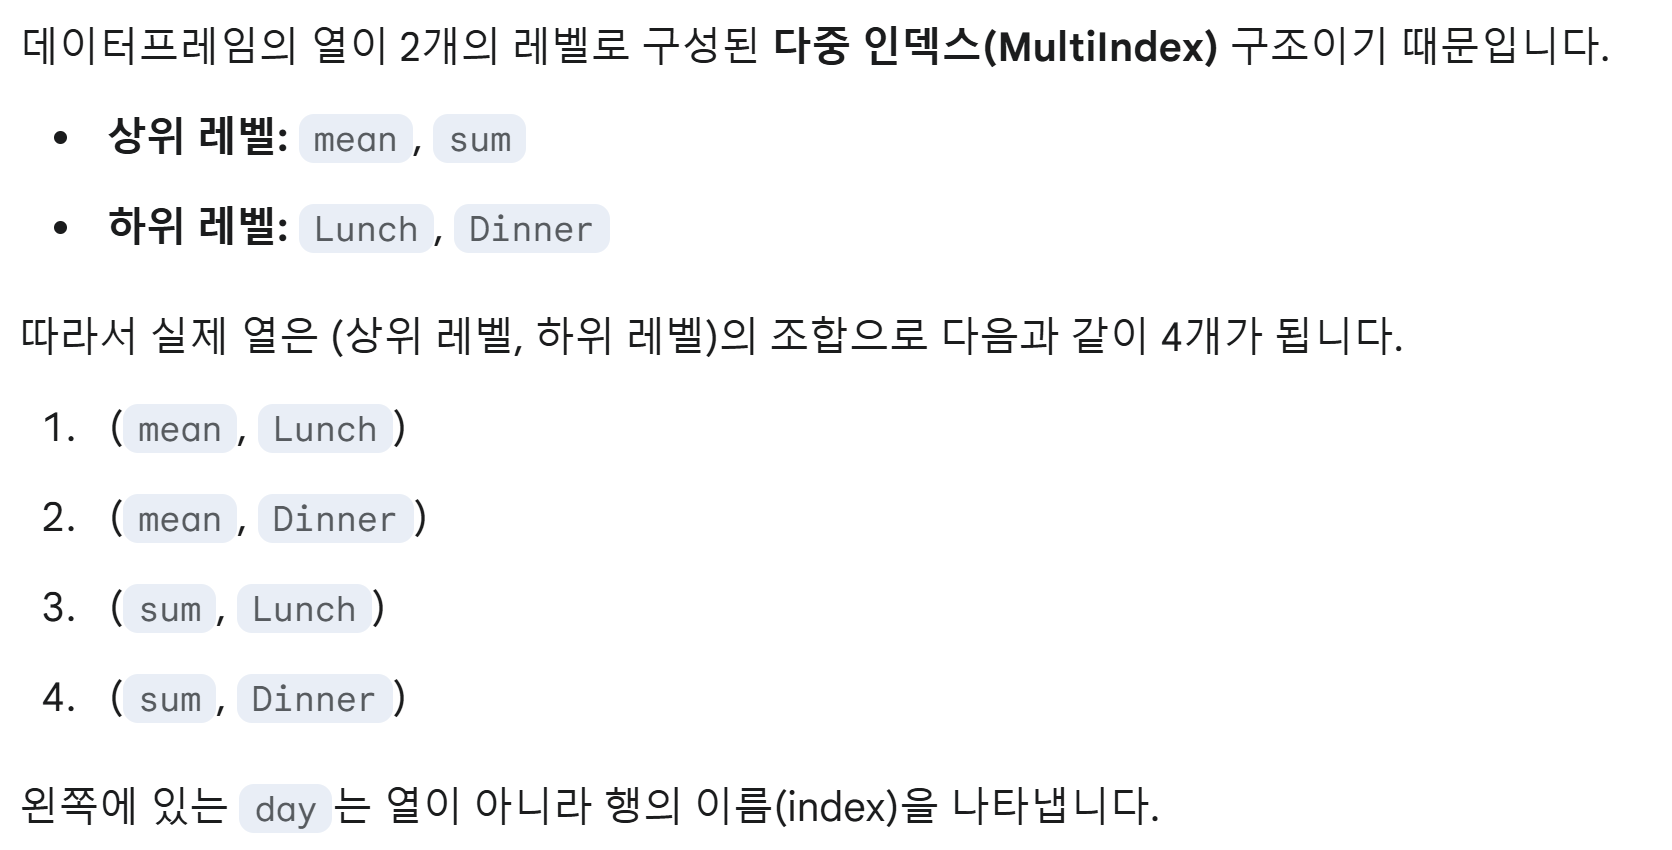

## 제출

제출을 위해 새로 로드된 타이타닉 데이터셋을 `sex`와 `pclass` 컬럼으로 그룹핑한 결과에서 `survived` 컬럼의 평균값을 구한 다음 인덱스를 초기화한 결과를 `result_df`에 저장하세요.

In [97]:
df = sns.load_dataset('titanic')

df2 = df.groupby(['sex', 'pclass'])['survived'].mean().reset_index()

result_df = df2
result_df

,sex,pclass,survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [98]:
import os

result_df.to_json('result.json')

os.system('elice_grade result.json cds_ds_exercise.ipynb')

send files ['result.json', 'cds_ds_exercise.ipynb'] for grade...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 1.486 seconds
=== Message ===
제출 완료되었습니다.


0